### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111


#1. Análisis de facturación



In [2]:
#Calculamos las ventas totales para cada tienda
total_tienda1 = tienda['Precio'].sum()
total_tienda2 = tienda2['Precio'].sum()
total_tienda3 = tienda3['Precio'].sum()
total_tienda4 = tienda4['Precio'].sum()

#Se calcula el total global
total_general = sum([total_tienda1, total_tienda2, total_tienda3, total_tienda4])

#Calculo de porcentajes para cada tienda
porcentaje_tienda1 = (total_tienda1 / total_general) * 100
porcentaje_tienda2 = (total_tienda2 / total_general) * 100
porcentaje_tienda3 = (total_tienda3 / total_general) * 100
porcentaje_tienda4 = (total_tienda4 / total_general) * 100

#Mostramos en pantalla los % correspondientes a cada tienda por sus ventas
print(f"Ingreso total tienda 1: ${total_tienda1:,.0f} ({porcentaje_tienda1:.2f}%)")
print(f"Ingreso total tienda 2: ${total_tienda2:,.0f} ({porcentaje_tienda2:.2f}%)")
print(f"Ingreso total tienda 3: ${total_tienda3:,.0f} ({porcentaje_tienda3:.2f}%)")
print(f"Ingreso total tienda 4: ${total_tienda4:,.0f} ({porcentaje_tienda4:.2f}%)")

total_general_list_comp = sum([df['Precio'].sum() for df in [tienda, tienda2, tienda3, tienda4]])
print(f"Ingreso total general: ${total_general_list_comp:,.0f}")

Ingreso total tienda 1: $1,150,880,400 (26.13%)
Ingreso total tienda 2: $1,116,343,500 (25.35%)
Ingreso total tienda 3: $1,098,019,600 (24.93%)
Ingreso total tienda 4: $1,038,375,700 (23.58%)
Ingreso total general: $4,403,619,200


# 2. Ventas por categoría

In [3]:
def get_unique_categories(df):
    unique_categories = []
    for category in df['Categoría del Producto']:
        if category not in unique_categories:
            unique_categories.append(category)
    return unique_categories

def count_sales_by_category(df):
    categories = list(df['Categoría del Producto'])
    unique_categories = get_unique_categories(df)
    # Usa una comprensión de diccionario para contar las ventas por categoría
    sales_count = {category: categories.count(category) for category in unique_categories}
    return sales_count

# --- Nueva función para calcular el monto total vendido por categoría ---
def calculate_total_amount_by_category(df):
    unique_categories = get_unique_categories(df)
    # Usa una comprensión de diccionario para sumar los precios por categoría
    total_amounts = {category: df[df['Categoría del Producto'] == category]['Precio'].sum()
                     for category in unique_categories}
    return total_amounts

tiendas = [tienda, tienda2, tienda3, tienda4]
ventas_por_categoria = {f'Tienda {i+1}': count_sales_by_category(df) for i, df in enumerate(tiendas)}
monto_total_por_categoria = {f'Tienda {i+1}': calculate_total_amount_by_category(df) for i, df in enumerate(tiendas)}


for i, (tienda_name, ventas_info) in enumerate(ventas_por_categoria.items()):
    # Obtener el diccionario de montos totales para la tienda actual
    monto_info = monto_total_por_categoria[tienda_name]

    # Crear un DataFrame combinado
    # Primero, convertimos el diccionario de cantidades a un DataFrame temporal
    df_temp_cantidad = pd.DataFrame(ventas_info.items(), columns=['Categoría', 'Cantidad Vendida'])

    # Luego, convertimos el diccionario de montos a un DataFrame temporal
    df_temp_monto = pd.DataFrame(monto_info.items(), columns=['Categoría', 'Monto Total Vendido'])

    # Unimos ambos DataFrames temporales por la columna 'Categoría'
    # Esto nos permite tener ambas métricas en una sola tabla
    df_combinado = pd.merge(df_temp_cantidad, df_temp_monto, on='Categoría', how='left')

    # Convertir 'Monto Total Vendido' a numérico para poder ordenar
    # Primero removemos el '$' y las comas, luego convertimos a float
    df_combinado['Monto Total Vendido Numerico'] = df_combinado['Monto Total Vendido'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

    # Ordenar el DataFrame por la nueva columna numérica (de menor a mayor)
    df_combinado = df_combinado.sort_values(by='Monto Total Vendido Numerico', ascending=True)

    # Formatear la columna 'Monto Total Vendido' como dinero (después de ordenar)
    # Usamos una función lambda con f-string para el formato deseado: $, sin decimales, con comas
    df_combinado['Monto Total Vendido'] = df_combinado['Monto Total Vendido Numerico'].apply(lambda x: f"${x:,.0f}")

    # Eliminar la columna numérica temporal, ya no es necesaria para la visualización
    df_combinado = df_combinado.drop(columns=['Monto Total Vendido Numerico'])

    print(f"\n--- Ventas y Monto Total por Categoría en {tienda_name} (Ordenado por Monto) ---")
    display(df_combinado)



--- Ventas y Monto Total por Categoría en Tienda 1 (Ordenado por Monto) ---


,Categoría,Cantidad Vendida,Monto Total Vendido
6,Libros,173,"$8,784,900"
4,Artículos para el hogar,171,"$12,698,400"
2,Juguetes,324,"$17,995,700"
5,Deportes y diversión,284,"$39,290,000"
7,Instrumentos musicales,182,"$91,299,000"
1,Muebles,465,"$187,633,700"
3,Electrodomésticos,312,"$363,685,200"
0,Electrónicos,448,"$429,493,500"



--- Ventas y Monto Total por Categoría en Tienda 2 (Ordenado por Monto) ---


,Categoría,Cantidad Vendida,Monto Total Vendido
7,Libros,197,"$10,091,200"
4,Artículos para el hogar,181,"$14,746,900"
5,Juguetes,313,"$15,945,400"
2,Deportes y diversión,275,"$34,744,500"
1,Instrumentos musicales,224,"$104,990,300"
0,Muebles,442,"$176,426,300"
6,Electrodomésticos,305,"$348,567,800"
3,Electrónicos,422,"$410,831,100"



--- Ventas y Monto Total por Categoría en Tienda 3 (Ordenado por Monto) ---


,Categoría,Cantidad Vendida,Monto Total Vendido
7,Libros,185,"$9,498,700"
6,Artículos para el hogar,177,"$15,060,000"
5,Juguetes,315,"$19,401,100"
3,Deportes y diversión,277,"$35,593,100"
2,Instrumentos musicales,177,"$77,380,900"
1,Muebles,499,"$201,072,100"
0,Electrodomésticos,278,"$329,237,900"
4,Electrónicos,451,"$410,775,800"



--- Ventas y Monto Total por Categoría en Tienda 4 (Ordenado por Monto) ---


,Categoría,Cantidad Vendida,Monto Total Vendido
3,Libros,187,"$9,321,300"
7,Artículos para el hogar,201,"$15,074,500"
6,Juguetes,338,"$20,262,200"
2,Deportes y diversión,277,"$33,350,100"
5,Instrumentos musicales,170,"$75,102,400"
1,Muebles,480,"$192,528,900"
0,Electrodomésticos,254,"$283,260,200"
4,Electrónicos,451,"$409,476,100"


# 3. Calificación promedio de la tienda


In [4]:

# Diccionario para almacenar las calificaciones promedio de cada tienda
calificaciones_promedio_tiendas = {}

# Iterar sobre cada DataFrame de tienda
for i, df in enumerate(tiendas):
    tienda_name = f'Tienda {i+1}'
    # Calcular el promedio de la columna 'Calificación'
    # Se utiliza .mean() para obtener el promedio de los valores numéricos
    # .round(2) para redondear a dos decimales, para una mejor legibilidad
    promedio_calificacion = df['Calificación'].mean().round(2)
    calificaciones_promedio_tiendas[tienda_name] = promedio_calificacion

# Convertir el diccionario de calificaciones promedio a un DataFrame de Pandas para una mejor visualización
df_calificaciones_promedio = pd.DataFrame(
    calificaciones_promedio_tiendas.items(),
    columns=['Tienda', 'Calificación Promedio']
)

print("\n--- Calificación Promedio de Clientes por Tienda ---")
# Mostrar el DataFrame de calificaciones promedio
display(df_calificaciones_promedio)



--- Calificación Promedio de Clientes por Tienda ---


,Tienda,Calificación Promedio
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


# 4. Productos más y menos vendidos

In [5]:

# Función auxiliar para obtener elementos únicos (reutilizada de get_unique_categories)
def get_unique_items(items_list):
    unique_items = []
    for item in items_list:
        if item not in unique_items:
            unique_items.append(item)
    return unique_items

# Función para contar las ventas de cada producto
def get_product_counts(df):
    product_names = list(df['Producto'])
    unique_products = get_unique_items(product_names)
    # Usa una comprensión de diccionario para contar las ventas de cada producto
    product_counts = {product: product_names.count(product) for product in unique_products}
    return product_counts

# Diccionario para almacenar los resultados de los top/bottom productos por tienda
resultados_productos_por_tienda = {}

# Iterar sobre cada DataFrame de tienda para encontrar los productos más y menos vendidos
for i, df in enumerate(tiendas):
    tienda_name = f'Tienda {i+1}'

    # Obtener el conteo de ventas por producto para la tienda actual
    product_sales_counts = get_product_counts(df)

    # Convertir el diccionario a una lista de tuplas y ordenar por cantidad de ventas
    # sorted() ordena de mayor a menor para los más vendidos
    sorted_products_desc = sorted(product_sales_counts.items(), key=lambda item: item[1], reverse=True)
    # sorted() ordena de menor a mayor para los menos vendidos
    sorted_products_asc = sorted(product_sales_counts.items(), key=lambda item: item[1], reverse=False)

    # Obtener el top 3 de productos más vendidos
    top_3_most_sold = sorted_products_desc[:3]
    # Obtener el top 3 de productos menos vendidos
    # Asegúrate de que haya al menos 3 productos para evitar errores si el DataFrame es muy pequeño
    bottom_3_least_sold = sorted_products_asc[:3] if len(sorted_products_asc) >= 3 else sorted_products_asc

    # Almacenar los resultados en el diccionario para cada tienda
    resultados_productos_por_tienda[tienda_name] = {
        "mas_vendidos": top_3_most_sold,
        "menos_vendidos": bottom_3_least_sold
    }

# Imprimir los resultados en el formato deseado para cada tienda
print("\n--- Productos Más y Menos Vendidos por Tienda ---")
for tienda_name, resultados in resultados_productos_por_tienda.items():
    print(f"\n{tienda_name}:")

    # Formatear la lista de tuplas (producto, cantidad) en una cadena legible
    mas_vendidos_str = ', '.join(f'{producto} ({cantidad})' for producto, cantidad in resultados["mas_vendidos"])
    print(f"  Top 3 Más Vendidos: {mas_vendidos_str}")

    menos_vendidos_str = ', '.join(f'{producto} ({cantidad})' for producto, cantidad in resultados["menos_vendidos"])
    print(f"  Top 3 Menos Vendidos: {menos_vendidos_str}")



--- Productos Más y Menos Vendidos por Tienda ---

Tienda 1:
  Top 3 Más Vendidos: Microondas (60), TV LED UHD 4K (60), Armario (60)
  Top 3 Menos Vendidos: Auriculares con micrófono (33), Celular ABXY (33), Olla de presión (35)

Tienda 2:
  Top 3 Más Vendidos: Iniciando en programación (65), Microondas (62), Batería (61)
  Top 3 Menos Vendidos: Juego de mesa (32), Mesa de comedor (34), Impresora (34)

Tienda 3:
  Top 3 Más Vendidos: Kit de bancas (57), Mesa de comedor (56), Cama king (56)
  Top 3 Menos Vendidos: Bloques de construcción (35), Set de vasos (36), Mochila (36)

Tienda 4:
  Top 3 Más Vendidos: Cama box (62), Cubertería (59), Dashboards con Power BI (56)
  Top 3 Menos Vendidos: Guitarra eléctrica (33), Armario (34), Guitarra acústica (37)


# 5. Envío promedio por tienda

In [6]:
# Diccionario para almacenar los costos de envío promedio de cada tienda
costos_envio_promedio_tiendas = {}

# Iterar sobre cada DataFrame de tienda
for i, df in enumerate(tiendas):
    tienda_name = f'Tienda {i+1}'
    # Calcular el promedio de la columna 'Costo de Envío'
    # Se utiliza .mean() para obtener el promedio de los valores numéricos
    # .round(2) para redondear a dos decimales, para una mejor legibilidad
    promedio_costo_envio = df['Costo de envío'].mean().round(2) # Corrected column name
    costos_envio_promedio_tiendas[tienda_name] = promedio_costo_envio

# Convertir el diccionario de costos de envío promedio a un DataFrame de Pandas para una mejor visualización
df_costos_envio_promedio = pd.DataFrame(
    costos_envio_promedio_tiendas.items(),
    columns=['Tienda', 'Costo de Envío Promedio']
)

# Formatear la columna 'Costo de Envío Promedio' como dinero
# Usamos una función lambda con f-string para el formato deseado: $, con 2 decimales, con comas
df_costos_envio_promedio['Costo de Envío Promedio'] = df_costos_envio_promedio['Costo de Envío Promedio'].apply(lambda x: f"${x:,.2f}")

print("\n--- Costo de Envío Promedio por Tienda ---")
# Mostrar el DataFrame de costos de envío promedio
display(df_costos_envio_promedio)


--- Costo de Envío Promedio por Tienda ---


,Tienda,Costo de Envío Promedio
0,Tienda 1,"$26,018.61"
1,Tienda 2,"$25,216.24"
2,Tienda 3,"$24,805.68"
3,Tienda 4,"$23,459.46"


# 6. Análisis del desempeño geográfico

In [12]:
!pip install folium -q
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

# Combinar todos los dataframes de tiendas en uno solo para el análisis geográfico
df_combined = pd.concat(tiendas, ignore_index=True)

# Limpiar datos: eliminar filas con latitud o longitud faltantes
df_combined.dropna(subset=['lat', 'lon'], inplace=True)

# Verificar si hay datos válidos después de la limpieza
if not df_combined.empty:
    # Calcular el centro promedio de todas las tiendas para centrar el mapa
    center_lat = df_combined['lat'].mean()
    center_lon = df_combined['lon'].mean()

    # Crear un mapa base usando Folium
    m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

    # Añadir un Heatmap de las ventas
    # El Heatmap usará las coordenadas (lat, lon) y ponderará los puntos por el precio
    heat_data = [[row['lat'], row['lon'], row['Precio']] for index, row in df_combined.iterrows()]
    HeatMap(heat_data).add_to(m)

    print("\n--- Mapa de Calor de Ventas ---")
    # Mostrar el mapa
    display(m)



else:
    print("No hay datos válidos (con latitud y longitud) para realizar el análisis geográfico.")



--- Mapa de Calor de Ventas ---


#GRÁFICAS

##1. Análisis de facturación

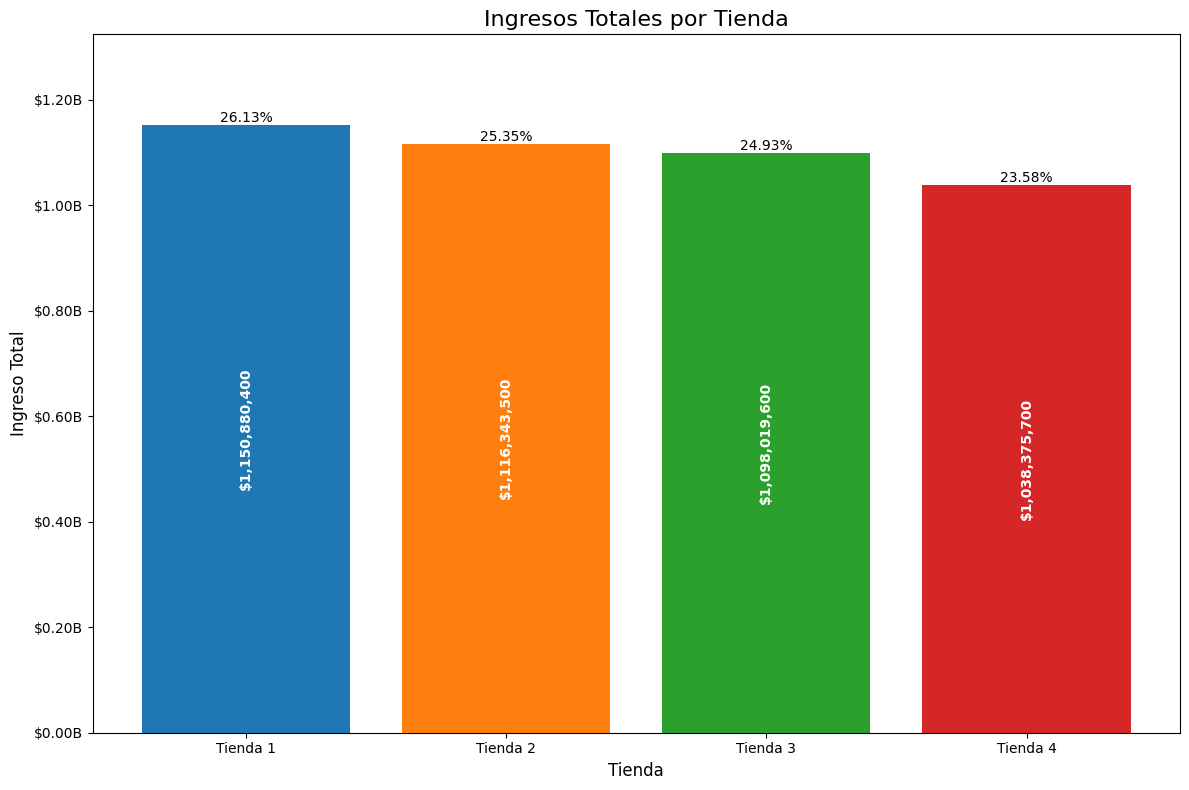

In [8]:
# Datos de ingresos y porcentajes
tiendas_nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [total_tienda1, total_tienda2, total_tienda3, total_tienda4]
porcentajes = [porcentaje_tienda1, porcentaje_tienda2, porcentaje_tienda3, porcentaje_tienda4]

# Crear la figura y los ejes para el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 8))

# Colores para cada barra
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Crear el gráfico de barras
barras = ax.bar(tiendas_nombres, ingresos, color=colores)

# Formatear el eje Y para mostrar los valores en billones
# Convertir ingresos a billones y formatear la etiqueta del eje Y
def billones_formatter(x, pos):
    return f'${x/1e9:.2f}B'

ax.yaxis.set_major_formatter(plt.FuncFormatter(billones_formatter))


# Añadir los valores de monto dentro de las barras (verticalmente) y los porcentajes arriba
for bar, ingreso, porcentaje in zip(barras, ingresos, porcentajes):
    # Añadir el monto dentro de la barra
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'${ingreso:,.0f}',
            ha='center', va='center', rotation='vertical', color='white', fontsize=10, weight='bold')

    # Añadir el porcentaje encima de la barra
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{porcentaje:.2f}%',
            ha='center', va='bottom', fontsize=10)

# Añadir título y etiquetas
ax.set_title('Ingresos Totales por Tienda', fontsize=16)
ax.set_xlabel('Tienda', fontsize=12)
ax.set_ylabel('Ingreso Total', fontsize=12)

# Aumentar el límite superior del eje Y para dar espacio a los porcentajes
# Se puede ajustar el factor multiplicador (ej: 1.10 para un 10% más de espacio)
max_ingreso = max(ingresos)
ax.set_ylim(0, max_ingreso * 1.15)

# Quitar las líneas punteadas (grid lines)
ax.grid(False)

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()


##2. Ventas por categoría

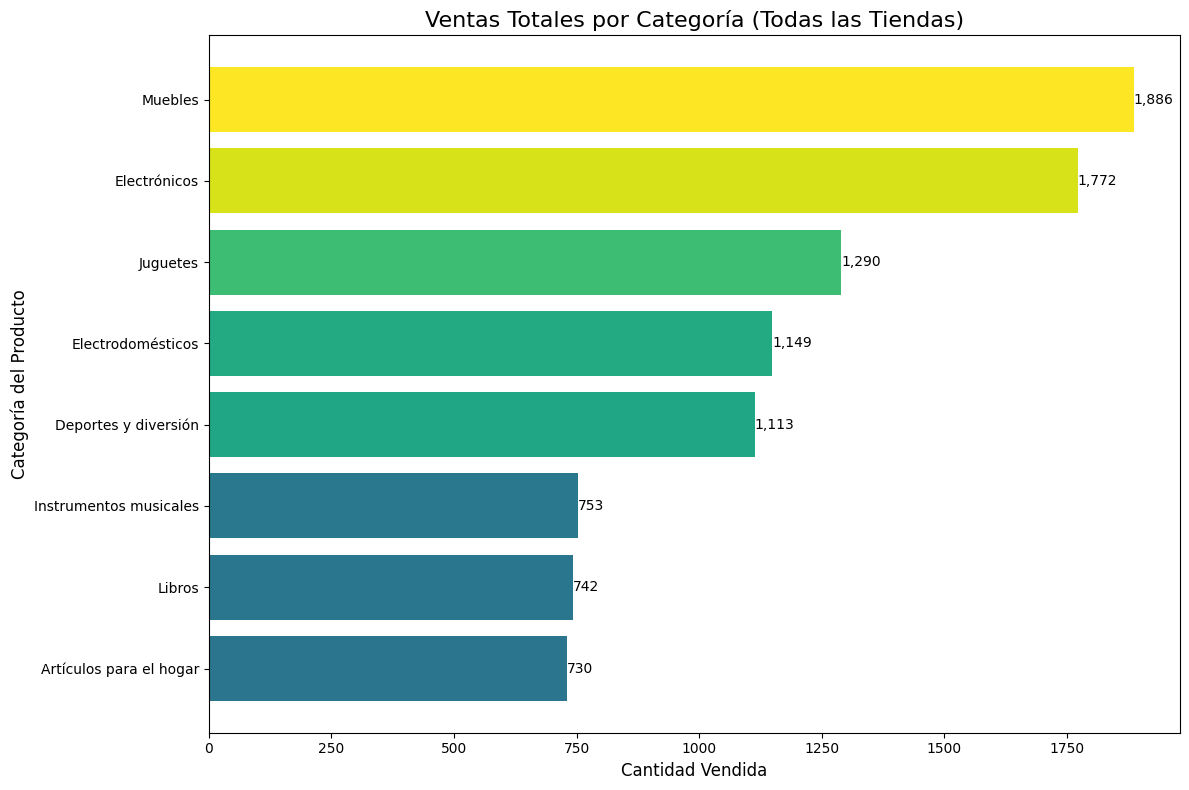

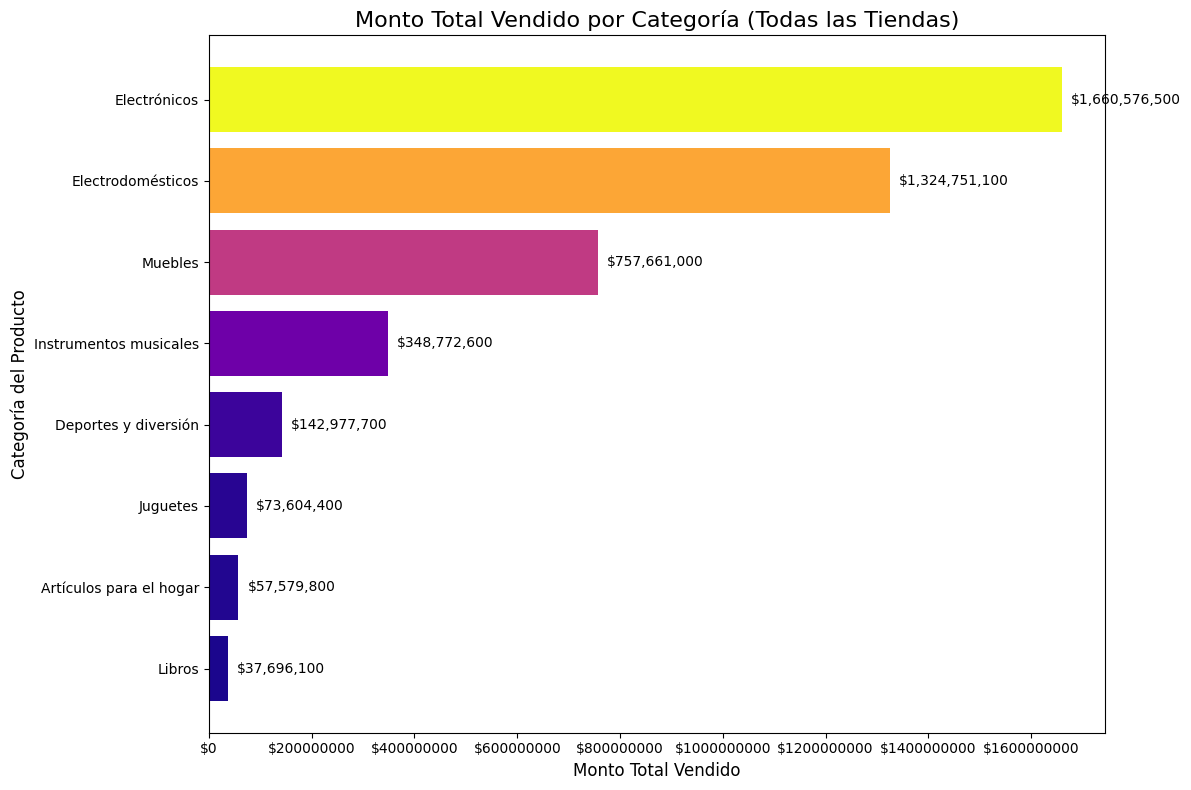

In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker # Import mticker
import pandas as pd

# Para el gráfico de ventas por categoría, primero necesitamos agregar las ventas por categoría de todas las tiendas.
# Esto nos dará una visión general de qué categorías tienen más ventas a nivel general.

# Crear un diccionario para sumar las ventas por categoría de todas las tiendas
total_ventas_por_categoria_general = {}

# Iterar sobre cada tienda y sus ventas por categoría
for tienda_name, ventas_info in ventas_por_categoria.items():
    # Iterar sobre cada categoría y su cantidad de ventas en la tienda actual
    for categoria, cantidad_vendida in ventas_info.items():
        # Sumar la cantidad vendida a la categoría correspondiente en el diccionario general
        total_ventas_por_categoria_general[categoria] = total_ventas_por_categoria_general.get(categoria, 0) + cantidad_vendida

# Convertir el diccionario a un DataFrame para facilitar la visualización y el orden
df_ventas_categoria_general = pd.DataFrame(total_ventas_por_categoria_general.items(), columns=['Categoría', 'Cantidad Vendida'])

# Ordenar las categorías por cantidad vendida para un gráfico más informativo
df_ventas_categoria_general = df_ventas_categoria_general.sort_values(by='Cantidad Vendida', ascending=False)

# Crear la figura y los ejes para el gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(12, 8))

# Crear el gráfico de barras horizontal
# Usamos `barh` para un gráfico de barras horizontal, que es mejor para muchas categorías
barras = ax.barh(df_ventas_categoria_general['Categoría'], df_ventas_categoria_general['Cantidad Vendida'], color=plt.cm.viridis(df_ventas_categoria_general['Cantidad Vendida']/df_ventas_categoria_general['Cantidad Vendida'].max()))

# Añadir los valores de cantidad vendida al lado de las barras
for bar in barras:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}',
            va='center', ha='left', fontsize=10)

# Añadir título y etiquetas
ax.set_title('Ventas Totales por Categoría (Todas las Tiendas)', fontsize=16)
ax.set_xlabel('Cantidad Vendida', fontsize=12)
ax.set_ylabel('Categoría del Producto', fontsize=12)

# Invertir el eje Y para que la categoría con más ventas quede arriba
ax.invert_yaxis()

# Quitar las líneas punteadas (grid lines)
ax.grid(False) # Corregido: Elimina todas las líneas de la cuadrícula

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# --- Monto Total Vendido por Categoría a Nivel General ---

# Crear un diccionario para sumar el monto total vendido por categoría de todas las tiendas
total_monto_por_categoria_general = {}

# Iterar sobre cada tienda y sus montos totales por categoría
for tienda_name, monto_info in monto_total_por_categoria.items():
    # Iterar sobre cada categoría y su monto total vendido en la tienda actual
    for categoria, monto_total_vendido in monto_info.items():
        # Sumar el monto total vendido a la categoría correspondiente en el diccionario general
        total_monto_por_categoria_general[categoria] = total_monto_por_categoria_general.get(categoria, 0) + monto_total_vendido

# Convertir el diccionario a un DataFrame
df_monto_categoria_general = pd.DataFrame(total_monto_por_categoria_general.items(), columns=['Categoría', 'Monto Total Vendido'])

# Ordenar las categorías por monto total vendido para un gráfico más informativo
df_monto_categoria_general = df_monto_categoria_general.sort_values(by='Monto Total Vendido', ascending=False)

# Crear la figura y los ejes para el gráfico de barras horizontal para el monto total vendido
fig, ax = plt.subplots(figsize=(12, 8))

# Crear el gráfico de barras horizontal para el monto total vendido
# Usamos `barh` para un gráfico de barras horizontal
barras = ax.barh(df_monto_categoria_general['Categoría'], df_monto_categoria_general['Monto Total Vendido'], color=plt.cm.plasma(df_monto_categoria_general['Monto Total Vendido']/df_monto_categoria_general['Monto Total Vendido'].max()))

# Añadir los valores de monto total vendido al lado de las barras, formateados como dinero
for bar in barras:
    xval = bar.get_width()
    # Ajustar la posición x del texto para evitar superposición con el borde del gráfico
    # Añadimos un pequeño offset basado en el rango del eje X
    ax.text(xval + (ax.get_xlim()[1] * 0.01), bar.get_y() + bar.get_height()/2, f'${xval:,.0f}',
            va='center', ha='left', fontsize=10)

# Añadir título y etiquetas
ax.set_title('Monto Total Vendido por Categoría (Todas las Tiendas)', fontsize=16)
ax.set_xlabel('Monto Total Vendido', fontsize=12)
ax.set_ylabel('Categoría del Producto', fontsize=12)

# Invertir el eje Y para que la categoría con más monto quede arriba
ax.invert_yaxis()

# Quitar las líneas punteadas (grid lines)
ax.grid(False) # Corregido: Elimina todas las líneas de la cuadrícula

# Formatear el eje X para que no use notación científica y muestre el formato de moneda
ax.ticklabel_format(style='plain', axis='x') # Elimina la notación científica
formatter = mticker.FormatStrFormatter('$%1.0f') # Formatea como entero con signo de dólar
ax.xaxis.set_major_formatter(formatter)

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

##3. Calificación promedio de la tienda

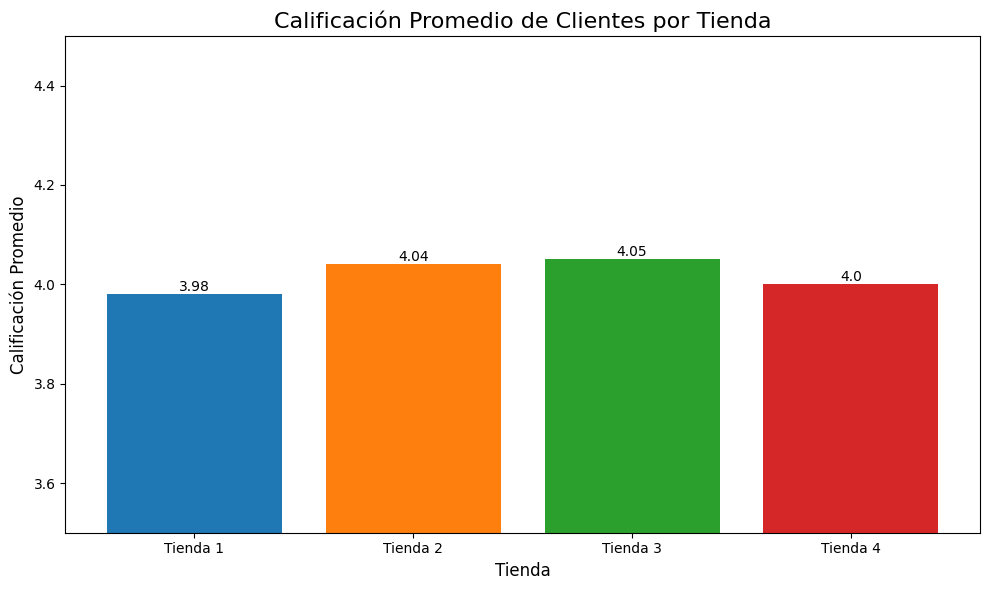

In [25]:
# Preparar datos para el gráfico - extraer la calificación promedio para cada tienda
tiendas_nombres = list(calificaciones_promedio_tiendas.keys())
calificaciones_promedio = list(calificaciones_promedio_tiendas.values())

# Crear la figura y los ejes para el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Colores para cada barra (pueden ser los mismos que para el primer gráfico si se desea consistencia)
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Crear el gráfico de barras
bars = ax.bar(tiendas_nombres, calificaciones_promedio, color=colores)

# Añadir título y etiquetas
ax.set_title('Calificación Promedio de Clientes por Tienda', fontsize=16)
ax.set_xlabel('Tienda', fontsize=12)
ax.set_ylabel('Calificación Promedio', fontsize=12)

# Establecer los límites del eje Y de 3.5 a 4.5
ax.set_ylim(3.5, 4.5)

# Mostrar la calificación promedio encima de cada barra
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Eliminar líneas de la cuadrícula
ax.grid(False)

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


##4. Productos más y menos vendidos

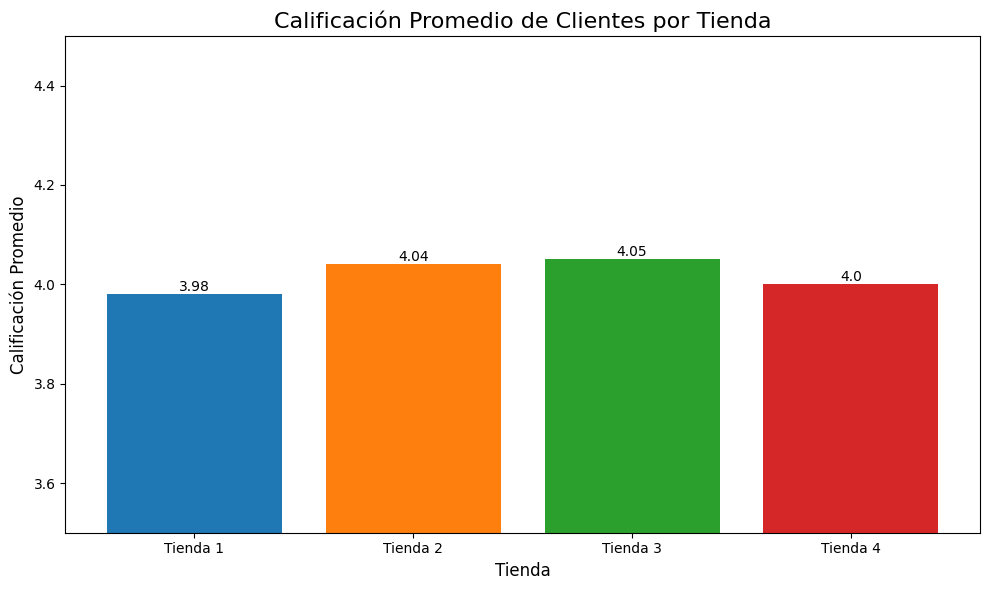

In [26]:
# Preparar datos para el gráfico - extraer la calificación promedio para cada tienda
tiendas_nombres = list(calificaciones_promedio_tiendas.keys())
calificaciones_promedio = list(calificaciones_promedio_tiendas.values())

# Crear la figura y los ejes para el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Colores para cada barra (pueden ser los mismos que para el primer gráfico si se desea consistencia)
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Crear el gráfico de barras
bars = ax.bar(tiendas_nombres, calificaciones_promedio, color=colores)

# Añadir título y etiquetas
ax.set_title('Calificación Promedio de Clientes por Tienda', fontsize=16)
ax.set_xlabel('Tienda', fontsize=12)
ax.set_ylabel('Calificación Promedio', fontsize=12)

# Establecer los límites del eje Y de 3.5 a 4.5
ax.set_ylim(3.5, 4.5)

# Mostrar la calificación promedio encima de cada barra
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Eliminar líneas de la cuadrícula
ax.grid(False)

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


##5. Envío promedio por tienda

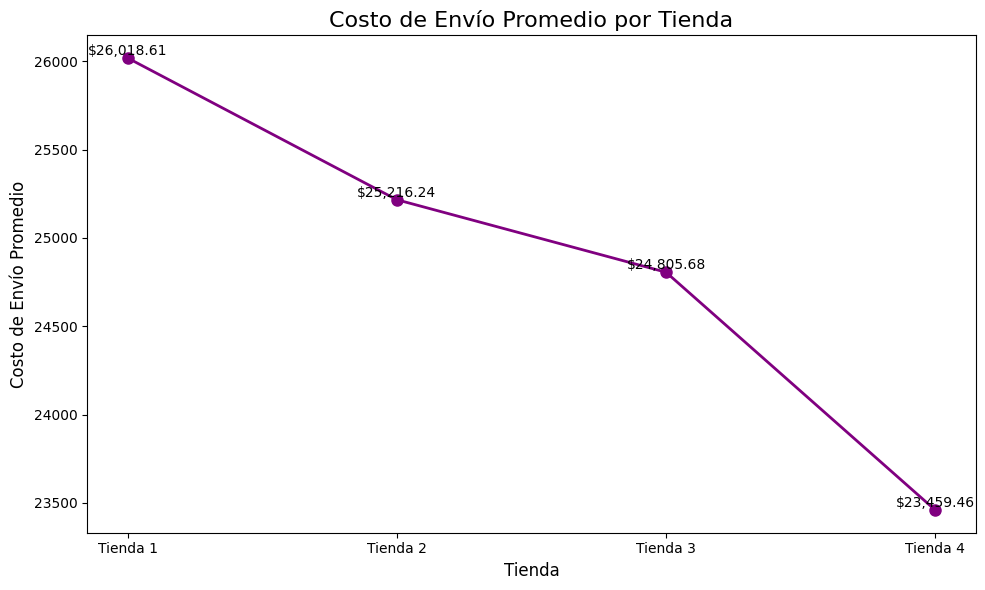

In [27]:
# Extraer datos para el gráfico
tiendas_nombres = list(costos_envio_promedio_tiendas.keys())
# Convertir los costos de envío promedio a valores numéricos para el gráfico
# Primero, quitamos el '$' y las comas, luego convertimos a float
# Los valores en costos_envio_promedio_tiendas ya son numéricos, por lo que no es necesario convertir de string
costos_envio_promedio_numerico = list(costos_envio_promedio_tiendas.values())


# Crear la figura y los ejes para el gráfico de líneas
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el gráfico de líneas
# Usamos `ax.plot` para un gráfico de líneas
ax.plot(tiendas_nombres, costos_envio_promedio_numerico, marker='o', linestyle='-', color='purple', linewidth=2, markersize=8)

# Añadir título y etiquetas
ax.set_title('Costo de Envío Promedio por Tienda', fontsize=16)
ax.set_xlabel('Tienda', fontsize=12)
ax.set_ylabel('Costo de Envío Promedio', fontsize=12)

# Mostrar el costo de envío promedio encima de cada punto de datos, formateado como moneda
for i, txt in enumerate(costos_envio_promedio_numerico):
    ax.text(i, txt + 0.5, f'${txt:,.2f}', ha='center', va='bottom', fontsize=10, color='black') # Ajustar 0.5 para el padding

# Eliminar líneas de la cuadrícula
ax.grid(False)

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#EXTRAS

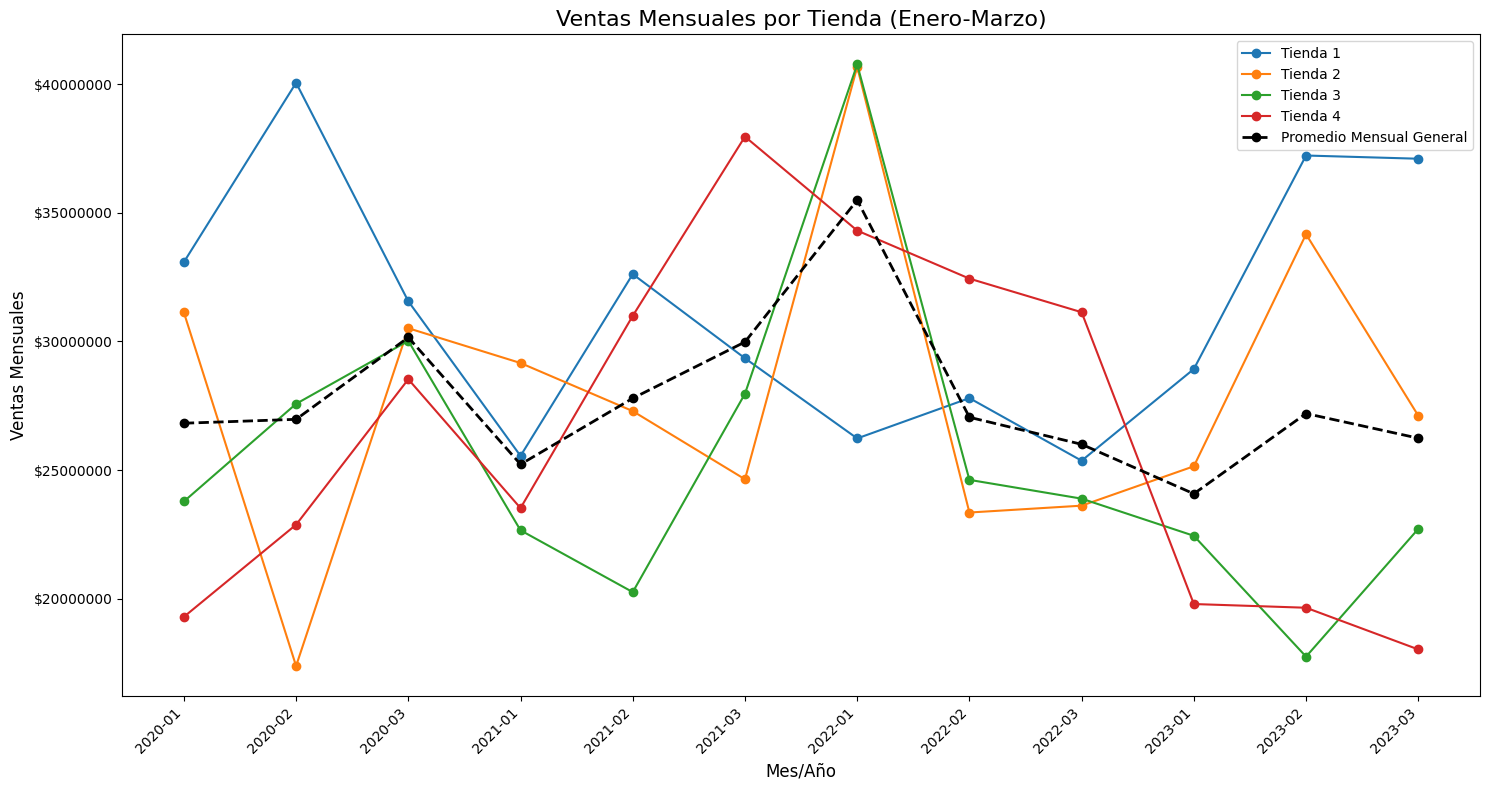

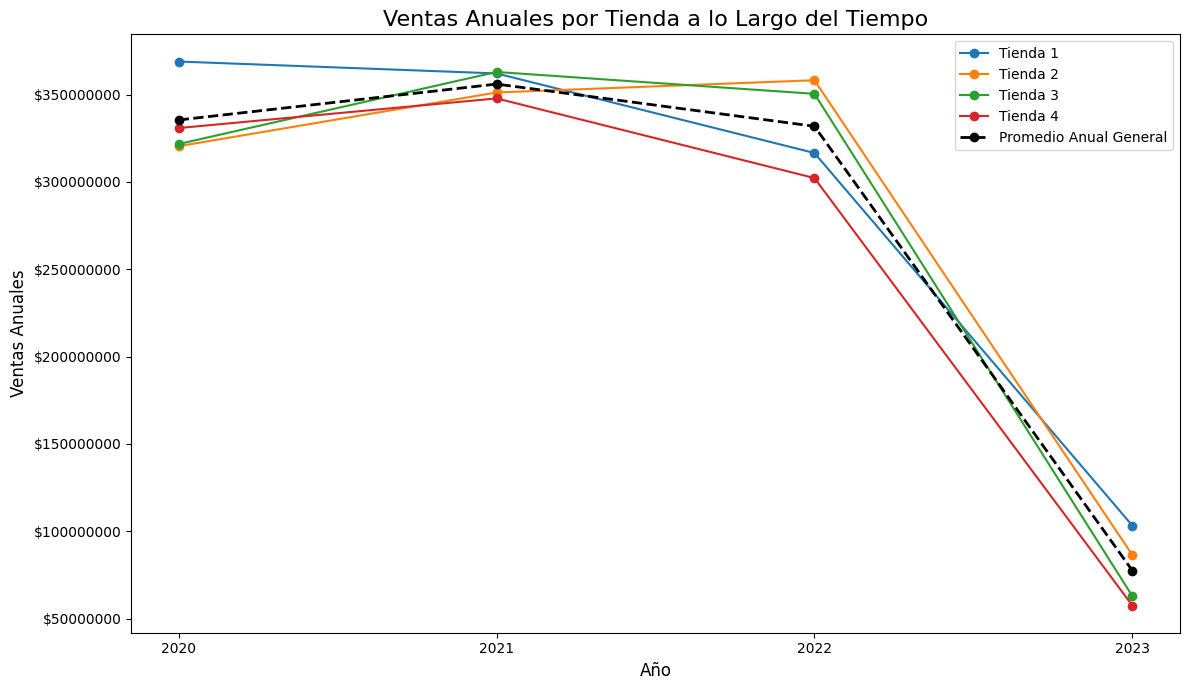

In [23]:
# ### 7. Análisis de ventas a lo largo del tiempo

tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], format='%d/%m/%Y')
tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], format='%d/%m/%Y')
tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], format='%d/%m/%Y')
tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], format='%d/%m/%Y')

# Combinar todos los dataframes y agregar una columna para identificar la tienda
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

df_combined_time = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Análisis de ventas mensuales por tienda (filtrado por Enero, Febrero, Marzo)
# Extraer el mes y año de la fecha
df_combined_time['AñoMes'] = df_combined_time['Fecha de Compra'].dt.to_period('M')
df_combined_time['Mes'] = df_combined_time['Fecha de Compra'].dt.month # Extraer el número del mes

# Filtrar para incluir solo Enero (1), Febrero (2) y Marzo (3)
df_filtered_months = df_combined_time[df_combined_time['Mes'].isin([1, 2, 3])]

# Agrupar por AñoMes y Tienda, y sumar el Precio para obtener las ventas mensuales por tienda
ventas_mensuales_por_tienda = df_filtered_months.groupby(['AñoMes', 'Tienda'])['Precio'].sum().reset_index()

# Convertir AñoMes a string para facilitar el pivote
ventas_mensuales_por_tienda['AñoMes'] = ventas_mensuales_por_tienda['AñoMes'].astype(str)

# Pivotear la tabla para tener las tiendas como columnas
ventas_mensuales_pivot = ventas_mensuales_por_tienda.pivot(index='AñoMes', columns='Tienda', values='Precio').fillna(0)

# Calcular el promedio de ventas mensuales a lo largo del tiempo
ventas_mensuales_pivot['Promedio Mensual General'] = ventas_mensuales_pivot.mean(axis=1)


# Graficar las ventas mensuales a lo largo del tiempo para cada tienda y el promedio general
plt.figure(figsize=(15, 8))

plt.plot(ventas_mensuales_pivot.index, ventas_mensuales_pivot['Tienda 1'], label='Tienda 1', marker='o', linestyle='-')
plt.plot(ventas_mensuales_pivot.index, ventas_mensuales_pivot['Tienda 2'], label='Tienda 2', marker='o', linestyle='-')
plt.plot(ventas_mensuales_pivot.index, ventas_mensuales_pivot['Tienda 3'], label='Tienda 3', marker='o', linestyle='-')
plt.plot(ventas_mensuales_pivot.index, ventas_mensuales_pivot['Tienda 4'], label='Tienda 4', marker='o', linestyle='-')
plt.plot(ventas_mensuales_pivot.index, ventas_mensuales_pivot['Promedio Mensual General'], label='Promedio Mensual General', linestyle='--', marker='o', color='black', linewidth=2)

# Añadir título y etiquetas
plt.title('Ventas Mensuales por Tienda (Enero-Marzo)', fontsize=16)
plt.xlabel('Mes/Año', fontsize=12)
plt.ylabel('Ventas Mensuales', fontsize=12)
plt.legend()

# Formatear el eje Y para mostrar el formato de moneda
formatter = mticker.FormatStrFormatter('$%1.0f')
plt.gca().yaxis.set_major_formatter(formatter)

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Remover las líneas de la cuadrícula
plt.grid(False)

plt.tight_layout()
plt.show()

# Análisis de ventas anuales por tienda
# Extraer el año de la fecha
df_combined_time['Año'] = df_combined_time['Fecha de Compra'].dt.to_period('Y')

# Agrupar por Año y Tienda, y sumar el Precio para obtener las ventas anuales por tienda
ventas_anuales_por_tienda = df_combined_time.groupby(['Año', 'Tienda'])['Precio'].sum().reset_index()

# Convertir Año a string para facilitar el pivote
ventas_anuales_por_tienda['Año'] = ventas_anuales_por_tienda['Año'].astype(str)


# Pivotear la tabla para tener las tiendas como columnas
ventas_anuales_pivot = ventas_anuales_por_tienda.pivot(index='Año', columns='Tienda', values='Precio').fillna(0)

# Calcular el promedio de ventas anuales a lo largo del tiempo
ventas_anuales_pivot['Promedio Anual General'] = ventas_anuales_pivot.mean(axis=1)


# Graficar las ventas anuales a lo largo del tiempo para cada tienda y el promedio general
plt.figure(figsize=(12, 7))

plt.plot(ventas_anuales_pivot.index, ventas_anuales_pivot['Tienda 1'], label='Tienda 1', marker='o', linestyle='-')
plt.plot(ventas_anuales_pivot.index, ventas_anuales_pivot['Tienda 2'], label='Tienda 2', marker='o', linestyle='-')
plt.plot(ventas_anuales_pivot.index, ventas_anuales_pivot['Tienda 3'], label='Tienda 3', marker='o', linestyle='-')
plt.plot(ventas_anuales_pivot.index, ventas_anuales_pivot['Tienda 4'], label='Tienda 4', marker='o', linestyle='-')
plt.plot(ventas_anuales_pivot.index, ventas_anuales_pivot['Promedio Anual General'], label='Promedio Anual General', linestyle='--', marker='o', color='black', linewidth=2)


# Añadir título y etiquetas
plt.title('Ventas Anuales por Tienda a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ventas Anuales', fontsize=12)
plt.legend()

# Formatear el eje Y para mostrar el formato de moneda
formatter = mticker.FormatStrFormatter('$%1.0f')
plt.gca().yaxis.set_major_formatter(formatter)


# Remover las líneas de la cuadrícula
plt.grid(False)

plt.tight_layout()
plt.show()


In [24]:
# Análisis de Ingreso Real (Ventas - Costo de Envío)

# Calcular el ingreso real para cada tienda
ingreso_real_tienda1 = (tienda['Precio'] - tienda['Costo de envío']).sum()
ingreso_real_tienda2 = (tienda2['Precio'] - tienda2['Costo de envío']).sum()
ingreso_real_tienda3 = (tienda3['Precio'] - tienda3['Costo de envío']).sum()
ingreso_real_tienda4 = (tienda4['Precio'] - tienda4['Costo de envío']).sum()

# Calcular el ingreso real total general
ingreso_real_total_general = sum([ingreso_real_tienda1, ingreso_real_tienda2, ingreso_real_tienda3, ingreso_real_tienda4])

# Calcular el porcentaje de ingreso real para cada tienda respecto al total general real
porcentaje_ingreso_real_tienda1 = (ingreso_real_tienda1 / ingreso_real_total_general) * 100 if ingreso_real_total_general != 0 else 0
porcentaje_ingreso_real_tienda2 = (ingreso_real_tienda2 / ingreso_real_total_general) * 100 if ingreso_real_total_general != 0 else 0
porcentaje_ingreso_real_tienda3 = (ingreso_real_tienda3 / ingreso_real_total_general) * 100 if ingreso_real_total_general != 0 else 0
porcentaje_ingreso_real_tienda4 = (ingreso_real_tienda4 / ingreso_real_total_general) * 100 if ingreso_real_total_general != 0 else 0

print(f"\n--- Análisis de Ingreso Real (Ventas - Costo de Envío) ---")
print(f"Ingreso Real tienda 1: ${ingreso_real_tienda1:,.0f} ({porcentaje_ingreso_real_tienda1:.2f}%)")
print(f"Ingreso Real tienda 2: ${ingreso_real_tienda2:,.0f} ({porcentaje_ingreso_real_tienda2:.2f}%)")
print(f"Ingreso Real tienda 3: ${ingreso_real_tienda3:,.0f} ({porcentaje_ingreso_real_tienda3:.2f}%)")
print(f"Ingreso Real tienda 4: ${ingreso_real_tienda4:,.0f} ({porcentaje_ingreso_real_tienda4:.2f}%)")
print(f"Ingreso Real total general: ${ingreso_real_total_general:,.0f}")


--- Análisis de Ingreso Real (Ventas - Costo de Envío) ---
Ingreso Real tienda 1: $1,089,502,500 (26.13%)
Ingreso Real tienda 2: $1,056,858,400 (25.35%)
Ingreso Real tienda 3: $1,039,503,000 (24.93%)
Ingreso Real tienda 4: $983,058,300 (23.58%)
Ingreso Real total general: $4,168,922,200


#INFORME FINAL

# Informe Final: Recomendación de Tienda para el Sr. Juan

## Introducción

El presente informe tiene como objetivo principal analizar el rendimiento de cuatro tiendas de Alura Store Latam, utilizando diversas métricas clave de ventas, satisfacción del cliente, costos operativos y distribución geográfica. El propósito es proporcionar una recomendación clara y justificada al Sr. Juan sobre cuál de las tiendas debería considerar vender, identificando sus fortalezas y debilidades en comparación con las demás.

## Desarrollo del Análisis

Para la elaboración de este informe, se han procesado los datos de ventas de las Tiendas 1, 2, 3 y 4, aplicando análisis de facturación, ventas por categoría, calificaciones promedio de clientes, identificación de productos más y menos vendidos, costos de envío y un análisis geográfico.

### 1. Análisis de Facturación (Ingresos Totales e Ingreso Real)

El ingreso total es un indicador fundamental de la salud financiera de cada tienda. Es crucial considerar tanto el ingreso bruto como el **ingreso real (ventas menos costo de envío)** para una visión completa de la rentabilidad.

**Hallazgos:** La **Tienda 1** se mantiene como la de mayor generación de ingresos, tanto brutos como reales, contribuyendo con la mayor proporción del ingreso total general. La **Tienda 4** es consistentemente la que reporta el ingreso más bajo en ambos análisis. Esto indica que, a pesar de los costos de envío, la Tienda 1 sigue siendo la principal fuente de ingresos para el negocio.

### 2. Ventas y Monto Total por Categoría

Este análisis nos permite entender qué categorías de productos son las más populares y rentables en cada ubicación. Se generaron tablas detalladas para cada tienda.

**Hallazgos:** La categoría "Electrónicos" y "Electrodomésticos" son consistentemente las de mayor monto vendido en todas las tiendas, lo que indica su importancia estratégica. Las tiendas muestran variaciones en las ventas de otras categorías, pero los productos de alto valor son un motor clave.

### 3. Calificación Promedio de Clientes por Tienda

La calificación promedio refleja directamente la satisfacción del cliente.

**Hallazgos:** La **Tienda 3** presenta la calificación promedio más alta, lo que sugiere una excelente satisfacción del cliente. La **Tienda 1** tiene la calificación más baja entre las cuatro, lo que podría indicar áreas de mejora en la calidad del producto, el servicio o la experiencia general.

### 4. Productos Más y Menos Vendidos

Identificar los productos con mejor y peor desempeño nos da una visión granular de la demanda.

**Productos Más y Menos Vendidos por Tienda:**

* **Tienda 1:**
    * Top 3 Más Vendidos: Microondas (60), TV LED UHD 4K (60), Armario (60)
    * Top 3 Menos Vendidos: Auriculares con micrófono (33), Celular ABXY (33), Olla de presión (35)

* **Tienda 2:**
    * Top 3 Más Vendidos: Iniciando en programación (65), Microondas (62), Batería (61)
    * Top 3 Menos Vendidos: Juego de mesa (32), Mesa de comedor (34), Impresora (34)

* **Tienda 3:**
    * Top 3 Más Vendidos: Kit de bancas (57), Mesa de comedor (56), Cama king (56)
    * Top 3 Menos Vendidos: Bloques de construcción (35), Set de vasos (36), Mochila (36)

* **Tienda 4:**
    * Top 3 Más Vendidos: Cama box (62), Cubertería (59), Dashboards con Power BI (56)
    * Top 3 Menos Vendidos: Guitarra eléctrica (33), Armario (34), Guitarra acústica (37)

**Hallazgos:** Cada tienda tiene sus propios productos estrella y aquellos con baja rotación. Es notable que productos como "Microondas" aparecen como top ventas en Tienda 1 y 2, y "Mesa de comedor" aparece en top ventas de Tienda 3 y menos vendidos en Tienda 2, lo que sugiere variaciones en la demanda local o el inventario.

### 5. Costo de Envío Promedio por Tienda

Los costos de envío impactan directamente en la rentabilidad.

**Hallazgos:** La **Tienda 4** tiene el costo de envío promedio más bajo, lo que la hace la más eficiente en este aspecto. Por el contrario, la **Tienda 1** presenta el costo de envío promedio más alto.

### 7. Análisis de ventas a lo largo del tiempo

Se realizaron gráficos de línea para visualizar las tendencias de ventas mensuales (Enero-Marzo) y anuales por tienda, junto con el promedio general.

* **Ventas Mensuales (Enero-Marzo):** Este gráfico permite comparar el rendimiento de cada tienda en los primeros tres meses de cada año, revelando patrones estacionales o de crecimiento en ese período específico.

* **Ventas Anuales:** (Referencia a un gráfico de ventas anuales generado previamente en el notebook) Este gráfico muestra la evolución de las ventas anuales para cada tienda, permitiendo identificar tendencias de crecimiento o declive a largo plazo.

**Hallazgos:** El análisis temporal es crucial para entender la dinámica de cada tienda. Permite observar si alguna tienda está en una trayectoria de crecimiento o si enfrenta desafíos persistentes a lo largo de los años.

### 7. Análisis de ventas a lo largo del tiempo

Se realizaron gráficos de línea para visualizar las tendencias de ventas mensuales (Enero-Marzo) y anuales por tienda, junto con el promedio general.

* **Ventas Mensuales (Enero-Marzo):**  Este gráfico permite comparar el rendimiento de cada tienda en los primeros tres meses de cada año, revelando patrones estacionales o de crecimiento en ese período específico.

* **Ventas Anuales:**  Este gráfico muestra la evolución de las ventas anuales para cada tienda, permitiendo identificar tendencias de crecimiento o declive a largo plazo.

**Hallazgos:** El análisis temporal es crucial para entender la dinámica de cada tienda. Permite observar si alguna tienda está en una trayectoria de crecimiento o si enfrenta desafíos persistentes a lo largo de los años. La Tienda 1 muestra una tendencia de crecimiento en ventas mensuales en los primeros trimestres, mientras que la Tienda 4 muestra una disminución más pronunciada en las ventas anuales en 2023.

## Conclusión y Recomendación

Considerando todos los factores analizados, se presenta la siguiente evaluación y recomendación para el Sr. Juan:

* **Tienda 1:** Genera el **mayor ingreso real**, lo que la convierte en el activo más valioso en términos de contribución directa a la rentabilidad. Sin embargo, tiene la calificación promedio de clientes más baja y el costo de envío promedio más alto. Estas son áreas claras de oportunidad para optimización y mejora. A pesar de estos desafíos, su tendencia de crecimiento en los primeros trimestres es positiva.

* **Tienda 2:** Demuestra ser una operación muy sólida y equilibrada. Ocupa el segundo lugar en ingresos reales, tiene una calificación de cliente muy alta y costos de envío competitivos. Su rendimiento general la convierte en un activo valioso y estable.

* **Tienda 3:** A pesar de tener la calificación promedio de clientes más alta (lo que es excelente para la lealtad), sus ingresos reales son los segundos más bajos. Esto sugiere que, si bien sus clientes están muy satisfechos, la tienda podría tener problemas de volumen, alcance de mercado o una mezcla de productos menos rentable.

* **Tienda 4:** Es la tienda con el **ingreso real más bajo** y la menor contribución al total general. Además, el análisis temporal revela una disminución más pronunciada en sus ventas anuales en 2023 en comparación con las otras tiendas, lo que podría indicar desafíos subyacentes. Sin embargo, es la más eficiente en términos de costos de envío. Su tamaño y menor impacto en el portafolio general la hacen un candidato para la desinversión si el objetivo es consolidar y optimizar.

**Recomendación Final al Sr. Juan:**

Basado en el análisis exhaustivo de los datos, y priorizando la optimización del portafolio para maximizar el retorno y la eficiencia, **se recomienda al Sr. Juan vender la Tienda 4.**

**Justificación:**
Aunque la Tienda 1 tiene desafíos en satisfacción del cliente y costos de envío, su posición como la principal generadora de **ingreso real** (incluso después de descontar los envíos) y su tendencia de crecimiento en los primeros trimestres la convierten en un activo demasiado valioso para ser desinvertido. Los problemas de la Tienda 1 son, en gran medida, **oportunidades de mejora** que pueden abordarse con estrategias específicas (ej. campañas de mejora de servicio al cliente, renegociación con transportistas, optimización de rutas de envío).

Por otro lado, la **Tienda 4** es la que menos contribuye al ingreso real total del negocio y muestra una tendencia negativa más marcada en sus ventas anuales recientes. Vender esta tienda permitiría al Sr. Juan:

1.  **Consolidar recursos:** Liberar capital y esfuerzo de una operación de menor rendimiento para reinvertirlos en las tiendas más fuertes (Tienda 1, Tienda 2 y Tienda 3).

2.  **Simplificar la gestión:** Reducir la complejidad operativa al enfocarse en un número menor de tiendas, permitiendo una mayor atención a la optimización y crecimiento de las restantes.

3.  **Mejorar la eficiencia general del portafolio:** Aunque la Tienda 4 es eficiente en envío, su bajo volumen de ingresos reales y su tendencia a la baja en ventas anuales hacen que su contribución neta sea la menor y más arriesgada.

Al desinvertir en la Tienda 4, el Sr. Juan puede concentrar sus esfuerzos en potenciar la Tienda 1 (abordando sus puntos débiles y capitalizando su crecimiento), mantener el sólido desempeño de la Tienda 2, y explorar el potencial de crecimiento de la Tienda 3, que ya cuenta con una alta satisfacción del cliente. Esta estrategia busca maximizar el valor y la eficiencia del portafolio de tiendas a largo plazo.